In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
algs = ["primal_lp", "dual_lp", "exp_lp", "dinic"]
capacities = ["50000-100000", "1-100", "1-1"]
capacities_colors = ["red", "green", "blue"]

# Experimenty
V následujícím vždy červená barva znázorňuje velké kapacity ($c\in\{50000,\ldots,100000\}$), zelená malé kapacity ($c\in\{1,\ldots,100\}$) a modrá jednotkové kapacity ($c=1$).

## Řídké náhodné grafy
Pro každé $d\in\{1,\ldots,15\}$ pouštěno postupně na grafy s $n$ vrcholy a $dn$ hranami pro $n\in[50,3000]\cap 5\mathbb{Z}$.

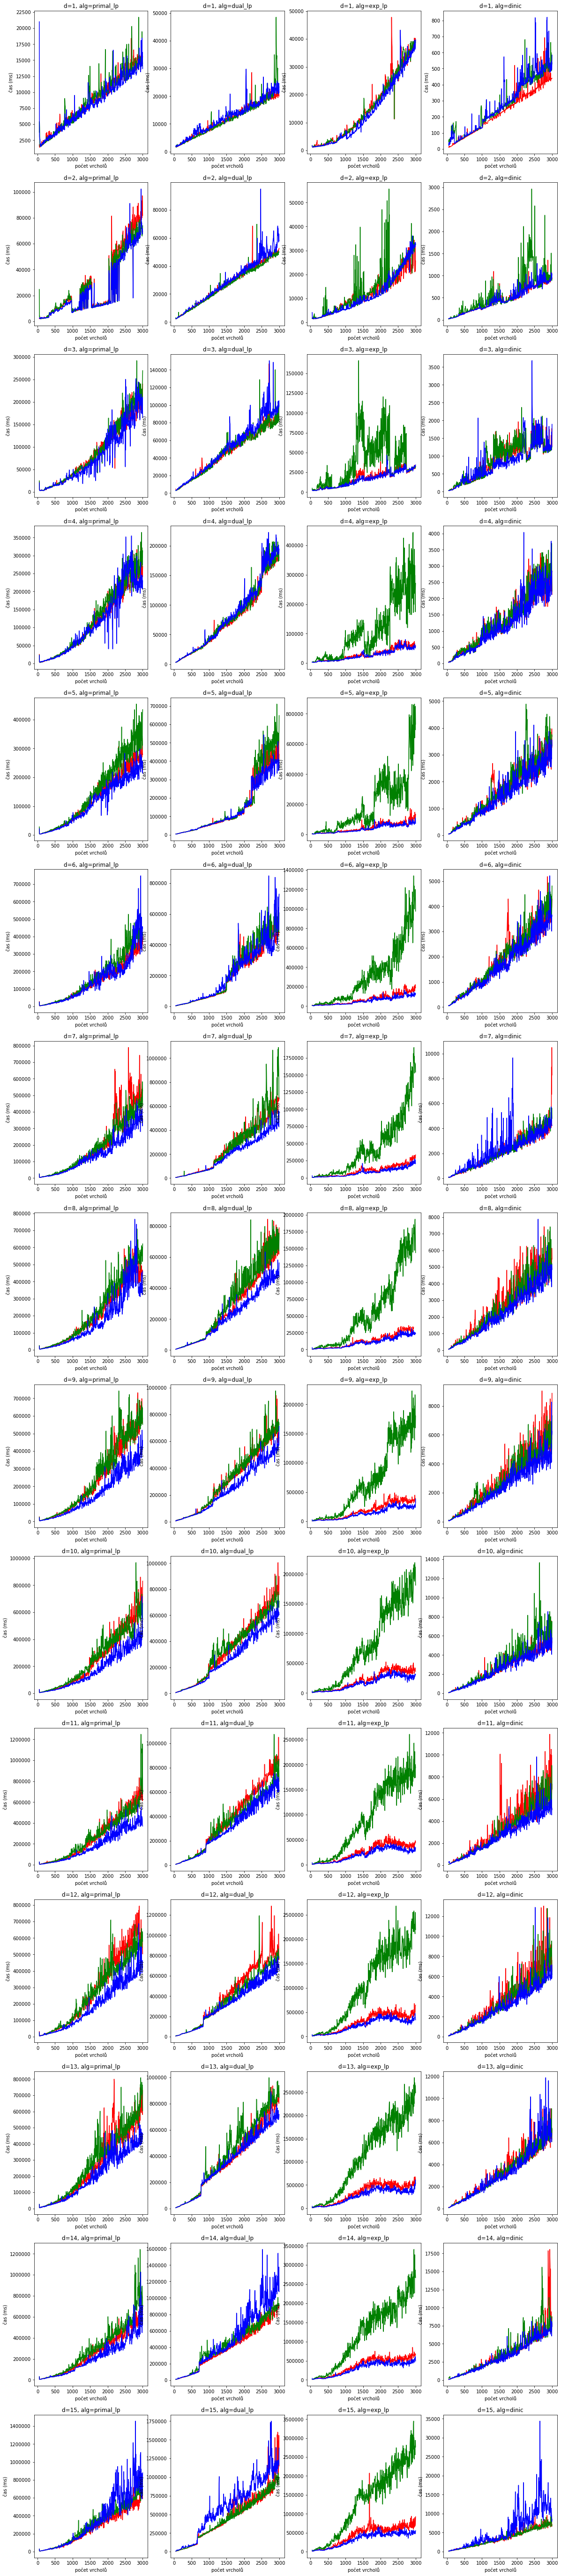

In [46]:
densities = range(1,16)
fig,axes = plt.subplots(nrows=len(densities),ncols=4,figsize=(20,100))

for cap,color in zip(capacities,capacities_colors):
    for i,d in enumerate(densities):
        dfs = [ pd.read_csv("../out/sparse{d}-{alg}-{cap}.csv".format(d=d,cap=cap,alg=alg)) for alg in algs ]
        for j,ax in enumerate(axes[i]):
            ax.set_xlabel("počet vrcholů")
            ax.set_ylabel("čas (ms)")
            ax.set_title("d={d}, alg={alg}".format(d=d,alg=algs[j]))
            ax.plot(dfs[j]['n'], dfs[j][algs[j]]/1000,color=color)        
plt.show()
   

Je na první pohled vidět a dalo se to taky čekat, že se řešiče LP nemůžou časově srovnávat s Dinicovým algoritmem, který je přímo na tento problém postavený. 
Je ale zajímavé porovnání časů formulace primárního a duálního programu. Pro některé sady instancí (d=3,4) je duální formulace výrazně lepší, pro jiné (d=7,9,12) je zase primární formulace lepší, pro ostatní je to cca stejné. Dále lze také konstantovat, že velikosti kapacit na dobu běhu algoritmu v průměru moc vliv nemají. Pro všechny 3 možnosti jsou běhy srovnatelně rychlé.

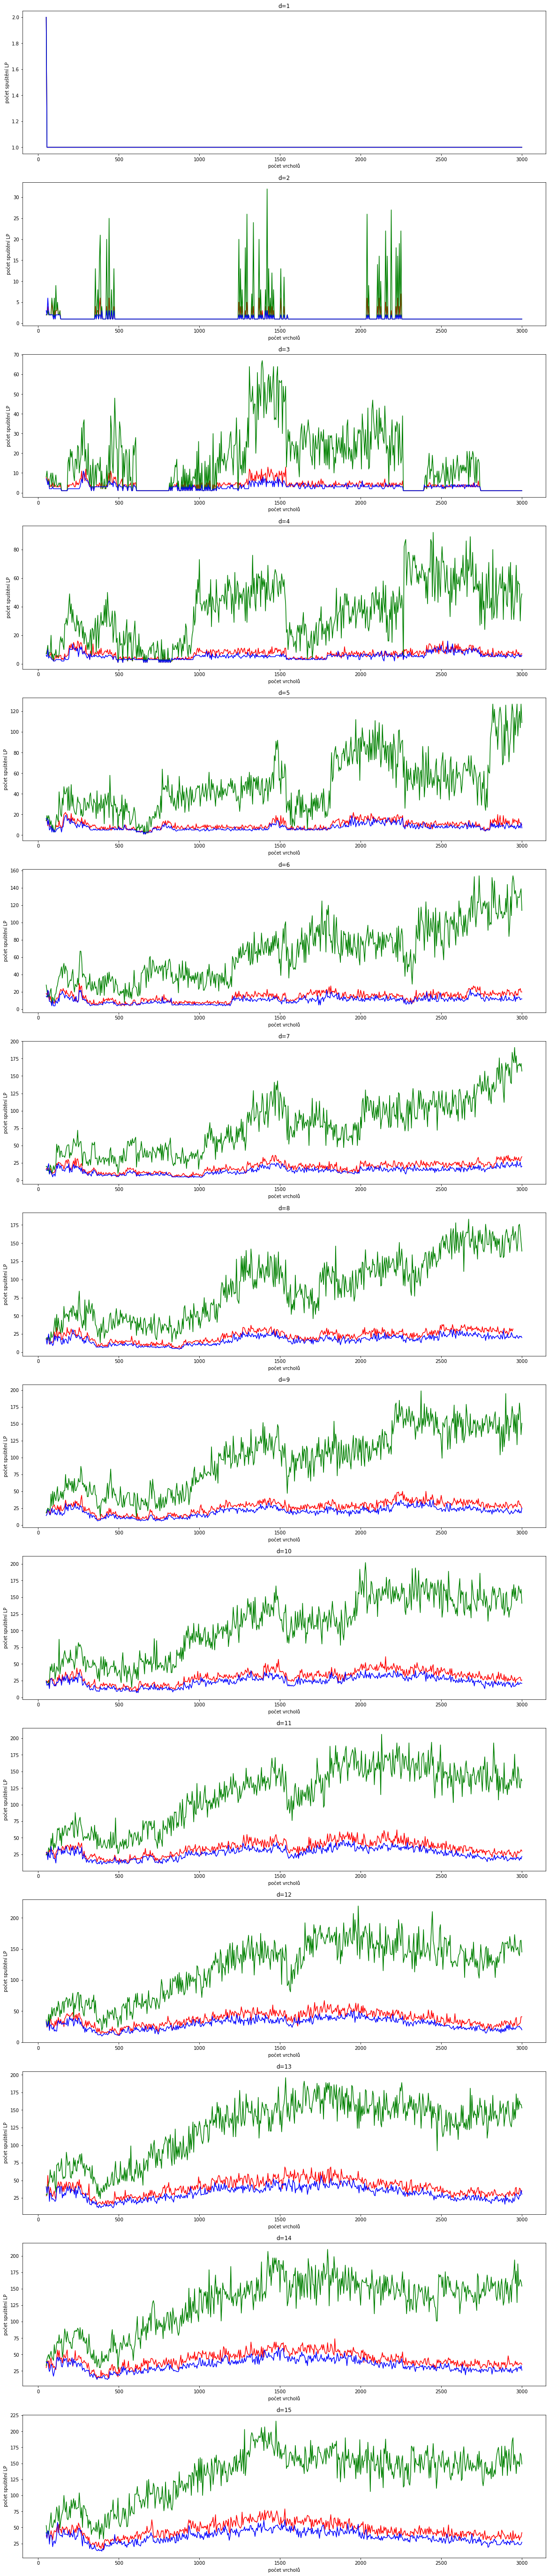

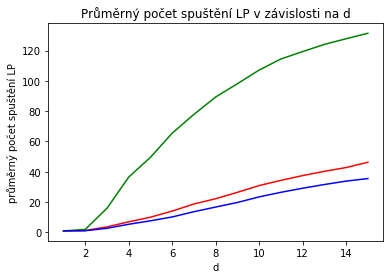

In [47]:

fig,axes = plt.subplots(nrows=len(sparse_constants),ncols=1,figsize=(20,100))
for cap,color in zip(capacities,capacities_colors):
    for i,d in enumerate(sparse_constants):
        dfEXPLP=pd.read_csv("../out/sparse{d}-exp_lp-{cap}.csv".format(d=d,cap=cap))
        axes[i].set_title("d={d}".format(d=d))
        axes[i].set_xlabel("počet vrcholů")
        axes[i].set_ylabel("počet spuštění LP")
        axes[i].plot(dfEXPLP['n'],dfEXPLP['lp_runs'],color=color)
plt.show()

for cap,color in zip(capacities,capacities_colors):
    avgsx=[]
    avgsy=[]
    for i,d in enumerate(sparse_constants):
        dfEXPLP=pd.read_csv("../out/sparse{d}-exp_lp-{cap}.csv".format(d=d,cap=cap))
        avgsx += [d]
        avgsy += [dfEXPLP['lp_runs'].mean()]
    plt.plot(avgsx,avgsy,color=color)
    plt.title("Průměrný počet spuštění LP v závislosti na d")
    plt.xlabel("d")
    plt.ylabel("průměrný počet spuštění LP")
plt.show()


Nyní se zaměřme na formulaci pomocí exponencielně mnoha podmínek, které byly přidány postupně. Kromě skutečné doby běhu je také zajímavé se podívat na počet spuštění LP (grafy výše).

Z grafů pro dobu běhu je patrné, že tato exponenciální formulace s postupným přidáváním podmínek běžela značně rychleji než přímočará formulace pomocí LP (ať už primárního nebo duálního). Lze si všimnout, že největší potíž algoritmu činily kapacity $c\in\{1,...,100\}$. Poslední graf ukazuje průměrný počet spuštění LP řešiče přes všechny velikosti instancí v závislosti na hustotě vstupního grafu.


## Husté náhodné grafy
Pro $n = 100, 200, ..., 1000$ vygenerován graf na $n$ vrcholech s postupně $n, n+100, n+200, ..., n^2$ hranami nebo dokud to neběželo moc pomalu (déle jak 5 vteřin)

FileNotFoundError: [Errno 2] File ../out/dense100-primal_lp-50000-100000.csv does not exist: '../out/dense100-primal_lp-50000-100000.csv'

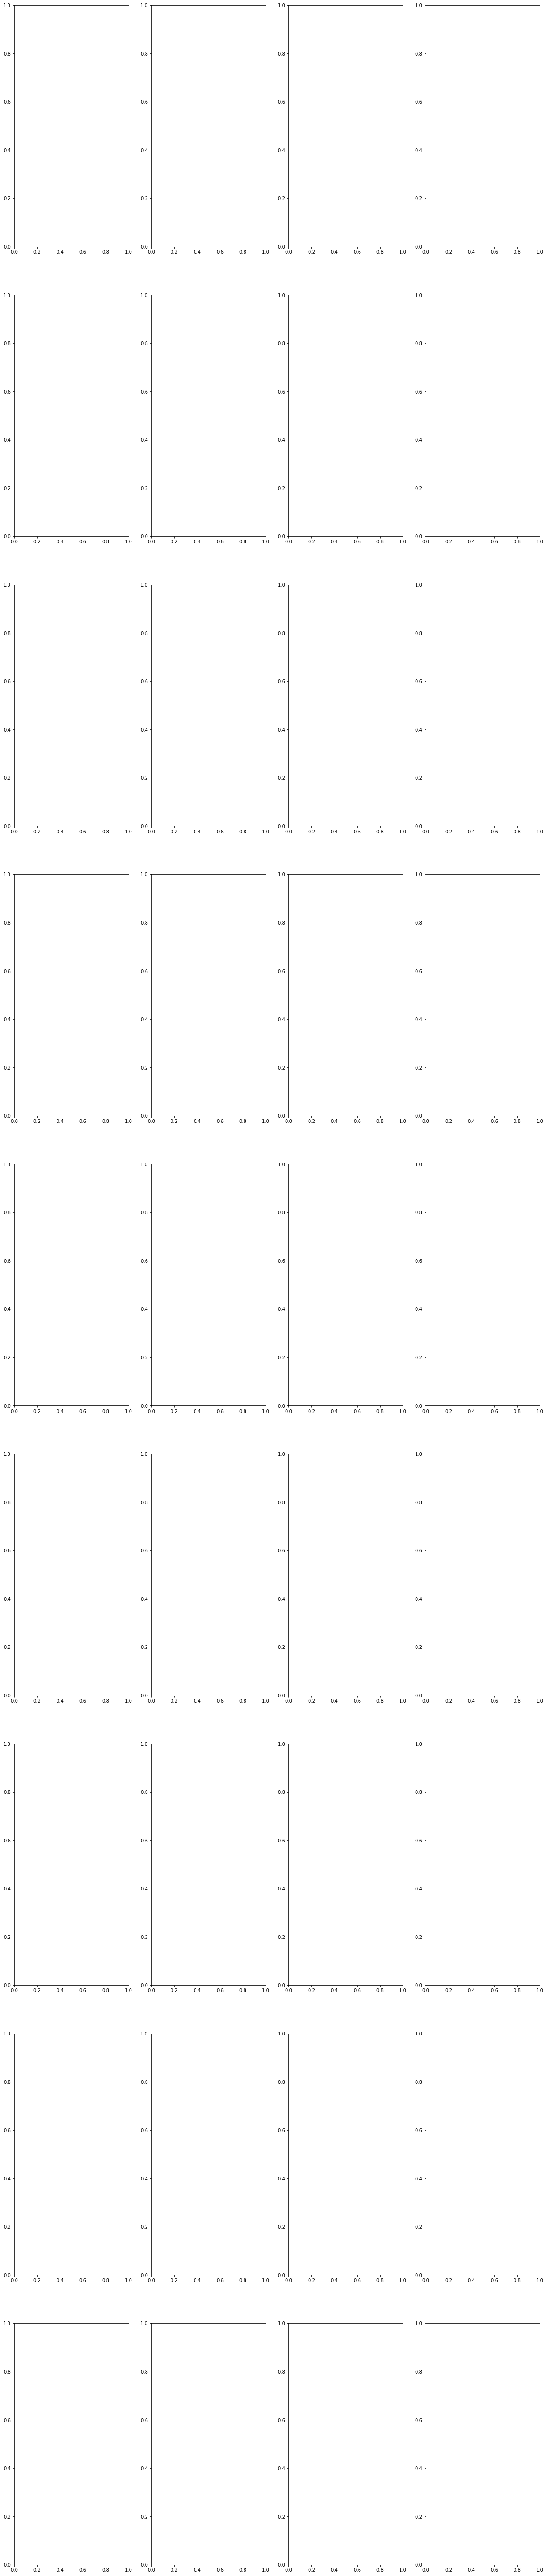

In [50]:
ns = range(100,1001,100)
fig,axes = plt.subplots(nrows=len(ns),ncols=4,figsize=(20,100))

for cap,color in zip(capacities,capacities_colors):
    for i,n in enumerate(ns):
        dfs = [ pd.read_csv("../out/dense{n}-{alg}-{cap}.csv".format(n=n,cap=cap,alg=alg)) for alg in algs ]
        for j,ax in enumerate(axes[i]):
            ax.set_xlabel("počet hran")
            ax.set_ylabel("čas (ms)")
            ax.set_title("n={n}, alg={alg}".format(n=n,alg=algs[j]))
            ax.plot(dfs[j]['m'], dfs[j][algs[j]]/1000,color=color)        
plt.show()




